In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# Load and prepare the data

In [5]:

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Species'] = iris.target_names[iris.target]


X = iris_df.drop('Species', axis=1)
y = iris_df['Species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Build and Train the Classification Model:

In [6]:

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=3)

# Predict and Evaluate the Model:

In [7]:

y_pred = knn.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



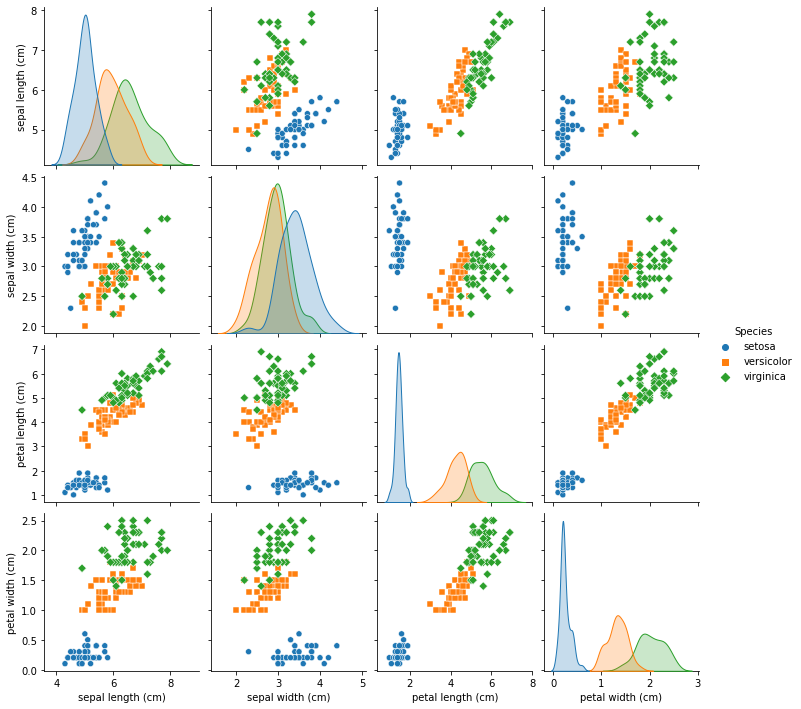

In [9]:


sns.pairplot(iris_df, hue='Species', markers=["o", "s", "D"])
plt.show()


In [12]:


dtree = DecisionTreeClassifier()


dtree.fit(X_train_scaled, y_train)


y_pred_dtree = dtree.predict(X_test_scaled)


accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"Accuracy with Decision Tree: {accuracy_dtree:.2f}")


Accuracy with Decision Tree: 1.00


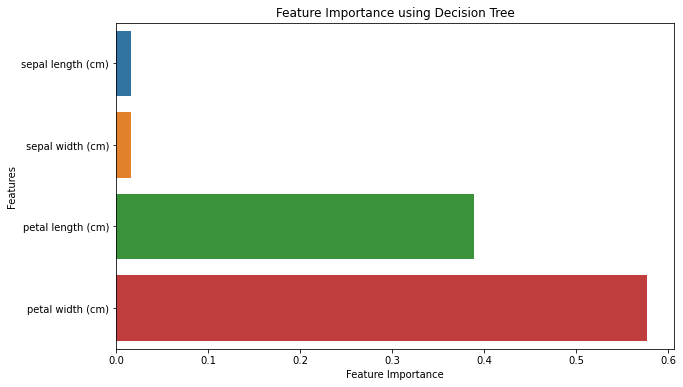

In [14]:

plt.figure(figsize=(10, 6))
sns.barplot(x=dtree.feature_importances_, y=iris.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance using Decision Tree')
plt.show()


In [15]:
neighbors = [1, 3, 5, 7, 9, 11]
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    print(f"Accuracy with {n} neighbors: {accuracy_knn:.2f}")


Accuracy with 1 neighbors: 1.00
Accuracy with 3 neighbors: 1.00
Accuracy with 5 neighbors: 1.00
Accuracy with 7 neighbors: 1.00
Accuracy with 9 neighbors: 1.00
Accuracy with 11 neighbors: 1.00
